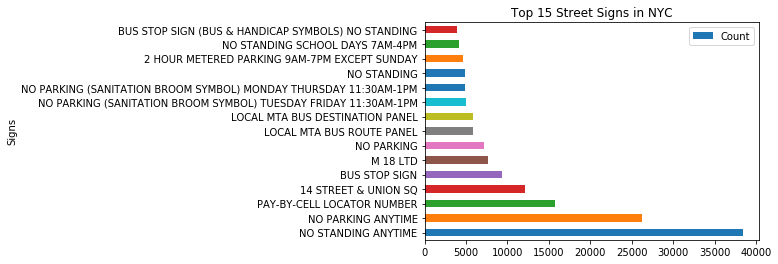

In [2]:
### Create a barchart of the top 15 street signs in NYC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in signs and locations data 
signs = pd.read_csv("signs.csv")
locations = pd.read_csv("locations.csv")
signLoc = pd.merge(signs, locations, left_on="SRP_Order", right_on="order_no")

# A simple function to preliminarily clean the messy street signs text 
def extractSign(s):
    try:
        if s.find("<") >= 0:
            return s[0:s.find("<")].strip()
        elif s.find("--") >= 0:
            return s[0:s.find("--")].strip()
        elif s.find("(") >= 0:
            return s[0:s.find("(")].strip()
        return s
    except AttributeError:
        return s
signLoc["Signs"] = signLoc["Sign_description"].apply(extractSign)

signsCount = signLoc.groupby("Signs").agg({"SRP_Boro": len}).rename(columns={"SRP_Boro": "Count"}).sort_values(by="Count", ascending=False)
signsCount = signsCount.reset_index(drop = False)

# Plot the top 15 signs by number of signs
sc10 = signsCount.iloc[3:18]
sc10.plot.barh(x="Signs", y="Count", rot=0, title="Top 15 Street Signs in NYC")
